In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
# Load Dataset
df = pd.read_csv('Iris.csv')

In [ ]:
# Encode target labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
# Split features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Define function to plot confusion matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    sns.set(font_scale=1)
    plt.figure(figsize=(10, 5))
    labels = [0, 1, 2]
    cmap1 = sns.light_palette("orange")
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".0f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()


In [ ]:
# Define function to evaluate models
def model_evaluations(X_train, y_train, X_test, y_test):
    gb = GaussianNB()
    knn = KNeighborsClassifier(round(math.sqrt(X_train.shape[0])))
    dt = DecisionTreeClassifier()
    gb.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print(f"\nModel: Naive Bayes\nAccuracy: {accuracy_score(y_test, y_pred)}")
    plot_confusion_matrix(y_test, y_pred)
    y_pred = knn.predict(X_test)
    print(f"\n\nModel: K Nearest Neighbors\nAccuracy: {accuracy_score(y_test, y_pred)}")
    plot_confusion_matrix(y_test, y_pred)
    y_pred = dt.predict(X_test)
    print(f"\n\nModel: Decision Tree\nAccuracy: {accuracy_score(y_test, y_pred)}")
    plot_confusion_matrix(y_test, y_pred)



Model: Naive Bayes
Accuracy: 1.0


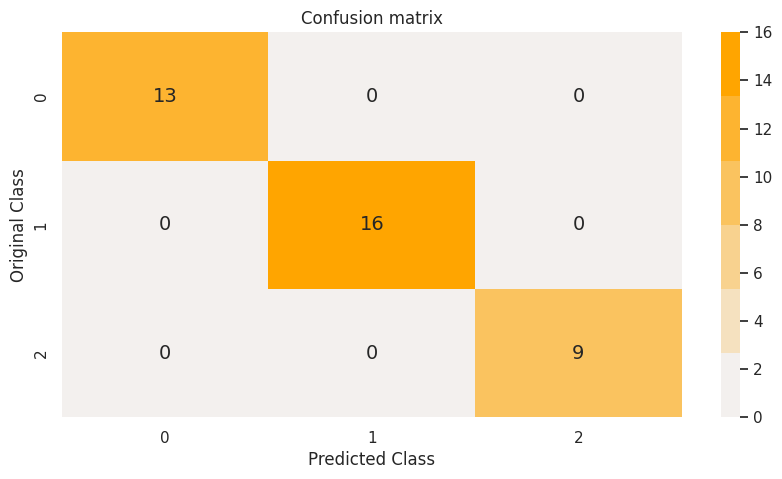



Model: K Nearest Neighbors
Accuracy: 1.0


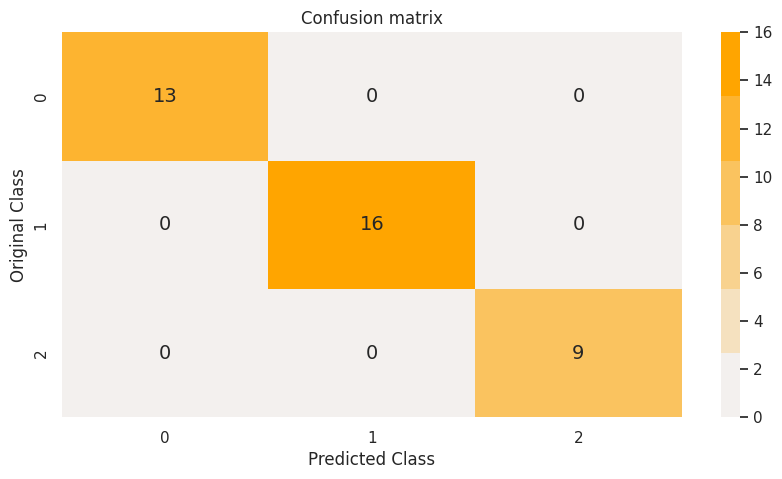



Model: Decision Tree
Accuracy: 0.9736842105263158


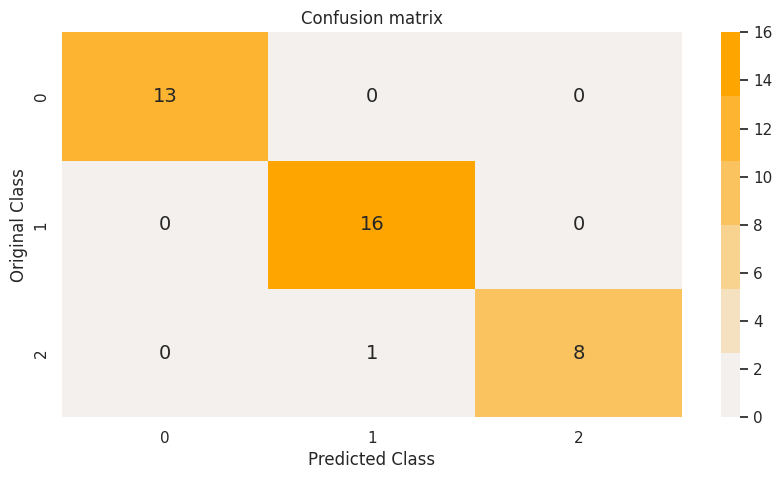

In [ ]:
# Example: Split dataset into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model_evaluations(X_train, y_train, X_test, y_test)

In [ ]:
# Example: Cross-validation
dt_scores = cross_val_score(DecisionTreeClassifier(), X, y)
print("Decision Tree Cross-Validation Score:", dt_scores.mean())

Decision Tree Cross-Validation Score: 0.9


In [ ]:

knn_scores = cross_val_score(KNeighborsClassifier(), X, y)
print("K Nearest Neighbors Cross-Validation Score:", knn_scores.mean())

K Nearest Neighbors Cross-Validation Score: 0.8733333333333333


In [ ]:
nb_scores = cross_val_score(GaussianNB(), X, y)
print("Naive Bayes Cross-Validation Score:", nb_scores.mean())

Naive Bayes Cross-Validation Score: 0.9933333333333334
